In [1]:
from pathlib import Path
import struct
import pandas as pd
import numpy as np

root = Path('/Users/sachinchanchani/datasets/CSPB.ML.2018R2')
data_dir = root / 'raw'
path_to_labels = root / 'labels.txt'


In [2]:
with open(data_dir / 'signal_1.tim', 'rb') as f:
    flag, N = struct.unpack('<2i', f.read(8))
    data = np.frombuffer(f.read(), dtype = np.float32 if flag == 1 else np.complex64)

In [3]:
columns = ['index', 'mod', 'base_symbol_period', 'cfo', 'ebw', 'upsample_factor', 'downsample_factor', 'snr', 'nsd']
df = pd.read_csv(path_to_labels, sep='\\s+', header=None, names=columns, index_col='index')

df['symbol_rate'] = (1. / df.base_symbol_period) * (df.downsample_factor / df.upsample_factor)
df.drop(columns=['base_symbol_period', 'upsample_factor', 'downsample_factor', 'nsd'], inplace=True)
df

,mod,cfo,ebw,snr,symbol_rate
index,,,,,
1,bpsk,-0.000839,0.824908,1.067359,0.428571
2,qpsk,-0.000839,0.824908,1.067359,0.428571
3,8psk,-0.000839,0.824908,1.067359,0.428571
4,dqpsk,-0.000839,0.824908,1.067359,0.428571
5,msk,-0.000839,0.824908,1.067359,0.428571
...,...,...,...,...,...
111996,dqpsk,-0.000046,0.564858,8.109200,0.098765
111997,msk,-0.000046,0.564858,8.109200,0.098765
111998,16qam,-0.000046,0.564858,8.109200,0.098765


In [4]:
df.describe()

,cfo,ebw,snr,symbol_rate
count,112000.000000,112000.000000,112000.000000,112000.000000
mean,-0.000003,0.552127,7.537723,0.140766
std,0.000576,0.260985,2.708738,0.101836
min,-0.001000,0.100063,0.008580,0.044444
25%,-0.000503,0.324655,5.784933,0.071429
50%,-0.000008,0.552290,8.051057,0.100000
75%,0.000493,0.779232,9.616349,0.166667
max,0.001000,0.999978,13.078203,0.500000


array([[<Axes: title={'center': 'symbol_rate'}>]], dtype=object)

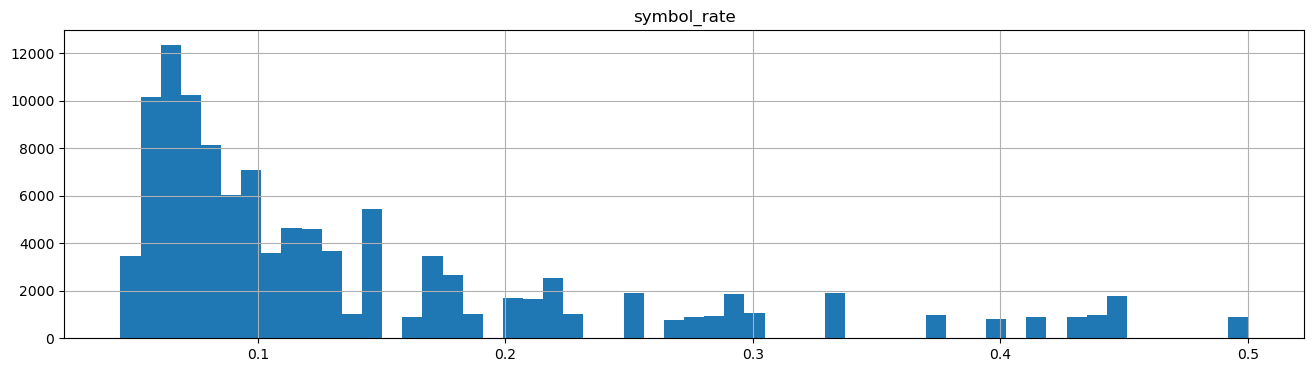

In [5]:
df.hist(column='symbol_rate', bins=56, figsize=(16, 4))

array([[<Axes: title={'center': 'cfo'}>]], dtype=object)

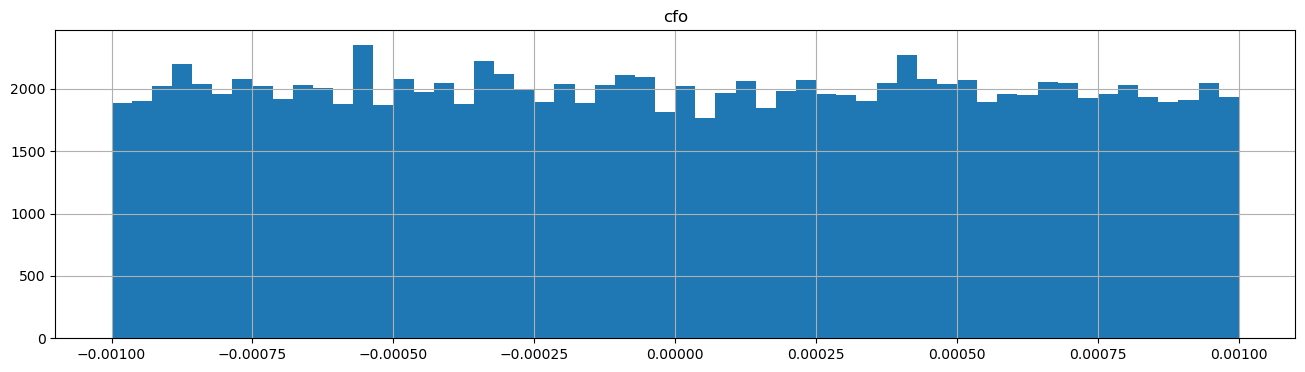

In [6]:
df.hist(column='cfo', bins=56, figsize=(16, 4))

array([[<Axes: title={'center': 'snr'}>]], dtype=object)

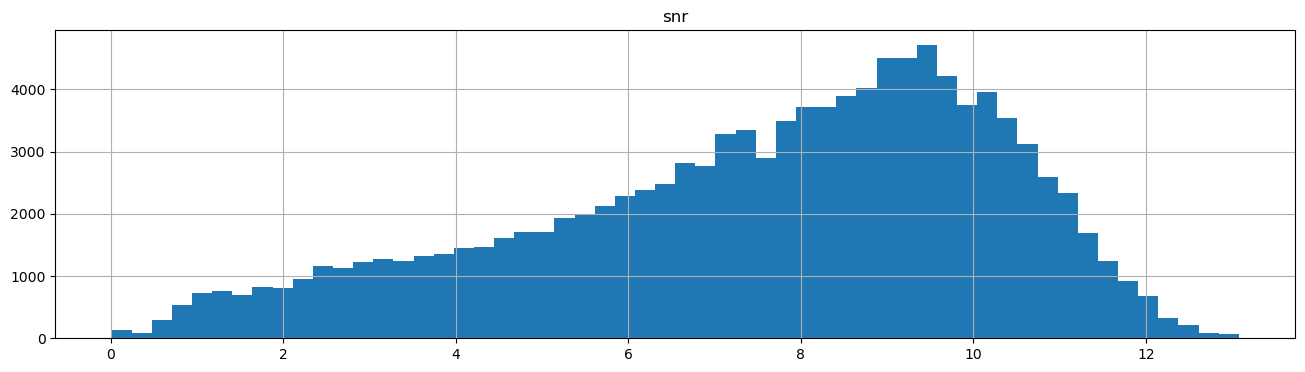

In [7]:
df.hist(column='snr', bins=56, figsize=(16, 4))